In [29]:
print('The Project starts')

The Project starts


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('Loan.csv')
#data.head()
#data.describe()


C:\Users\SidharthSharma\AppData\Local\Temp\ipykernel_25720\1403671110.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age = data.groupby('AgeGroup')['RiskScore'].mean()  # or .sum()


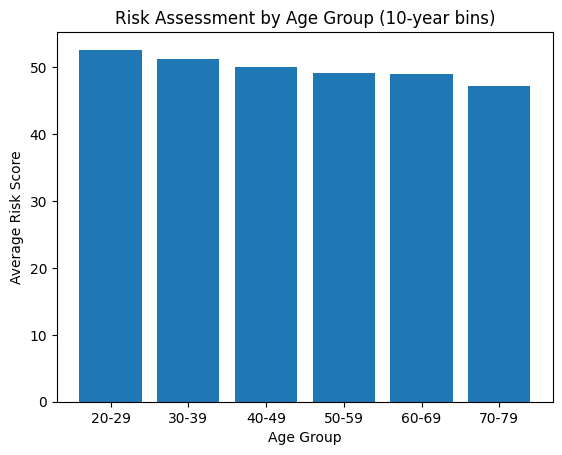

In [31]:
#visualization 
# Define bins and labels
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

# Create an AgeGroup column
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Aggregate RiskScore by AgeGroup (mean, sum, or count — whichever makes sense)
risk_by_age = data.groupby('AgeGroup')['RiskScore'].mean()  # or .sum()

# Plot
plt.bar(risk_by_age.index.astype(str), risk_by_age.values)
plt.xlabel("Age Group")
plt.ylabel("Average Risk Score")
plt.title("Risk Assessment by Age Group (10-year bins)")
plt.show()

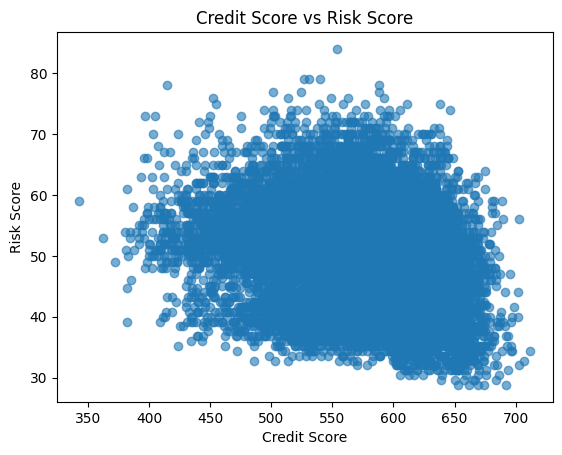

In [32]:
import matplotlib.pyplot as plt

plt.scatter(data['CreditScore'], data['RiskScore'], alpha=0.6)
plt.xlabel("Credit Score")
plt.ylabel("Risk Score")
plt.title("Credit Score vs Risk Score")
plt.show()


In [34]:
data.drop(columns='AgeGroup',axis=1,inplace=True)
data.columns

KeyError: "['AgeGroup'] not found in axis"

In [35]:
data.drop(columns=['InterestRate','LoanApproved','BaseInterestRate','MonthlyLoanPayment','TotalDebtToIncomeRatio'],axis=1,inplace=True)
data.drop('ApplicationDate',inplace=True,axis=1)
data.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'RiskScore'],
      dtype='object')

In [36]:
print(data['EmploymentStatus'].value_counts())
print(data['HomeOwnershipStatus'].value_counts())
print(data['MaritalStatus'].value_counts())
print(data['EducationLevel'].value_counts())
print(data['LoanPurpose'].value_counts())

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64
HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64
MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64
EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64
LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64


In [37]:
data['RiskScore'].describe()

count    20000.000000
mean        50.766780
std          7.778262
min         28.800000
25%         46.000000
50%         52.000000
75%         56.000000
max         84.000000
Name: RiskScore, dtype: float64

In [38]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Assume your DataFrame is 'data'
# 1. Bin RiskScore into 10 quantiles for stratification
data['RiskScore_bin'] = pd.qcut(data['RiskScore'], q=10, labels=False)
data['RiskScore_bin']




0        3
1        4
2        4
3        6
4        0
        ..
19995    6
19996    6
19997    2
19998    8
19999    8
Name: RiskScore_bin, Length: 20000, dtype: int64

In [39]:
# 2. Stratified Shuffle Split on RiskScore_bin
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(data, data['RiskScore_bin']):
    train_data = data.iloc[train_idx].copy()
    test_data = data.iloc[test_idx].copy()

# 3. Drop the temporary bin column
train_data.drop('RiskScore_bin', axis=1, inplace=True)
test_data.drop('RiskScore_bin', axis=1, inplace=True)

# 4. Verify categorical coverage
categorical_cols = [
    'EmploymentStatus', 'HomeOwnershipStatus', 'MaritalStatus', 
    'EducationLevel', 'LoanPurpose'
]

for col in categorical_cols:
    missing_in_test = set(train_data[col].unique()) - set(test_data[col].unique())
    missing_in_train = set(test_data[col].unique()) - set(train_data[col].unique())
    print(f"{col} - missing in test: {missing_in_test}, missing in train: {missing_in_train}")

EmploymentStatus - missing in test: set(), missing in train: set()
HomeOwnershipStatus - missing in test: set(), missing in train: set()
MaritalStatus - missing in test: set(), missing in train: set()
EducationLevel - missing in test: set(), missing in train: set()
LoanPurpose - missing in test: set(), missing in train: set()


In [11]:
#train_data.info() non-non null values are present 
train_data

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,RiskScore
10003,41,46238,613,Employed,Doctorate,18,33257,96,Married,0,...,22,6494,279,66949,9316,3853.166667,0.848282,5,57633,56.0
2952,45,51509,588,Employed,Bachelor,21,10930,72,Single,2,...,5,1678,493,243288,19288,4292.416667,0.845614,4,224000,53.0
12717,22,53349,609,Employed,Associate,2,31097,60,Single,0,...,23,1889,585,22734,31315,4445.750000,0.904101,6,10100,48.0
9527,45,80472,540,Employed,Master,23,32804,60,Divorced,0,...,17,573,1399,34934,4087,6706.000000,0.726457,2,30847,39.2
14044,41,146311,570,Employed,Bachelor,19,54268,60,Single,0,...,13,5347,915,470760,55466,12192.583333,0.512341,7,415294,32.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,29,57641,592,Employed,High School,7,19554,12,Divorced,1,...,8,1686,1803,51815,115583,4803.416667,0.962491,4,2942,51.0
5111,70,52367,589,Employed,Bachelor,48,17686,60,Single,1,...,17,1134,318,50271,60909,4363.916667,0.872002,2,3067,50.0
3439,43,87075,655,Self-Employed,Master,23,16528,48,Single,0,...,29,3065,2021,61880,936,7256.250000,0.826022,7,60944,35.2
12110,45,97261,540,Self-Employed,High School,23,16039,24,Divorced,4,...,3,43463,1263,44726,52599,8105.083333,0.905613,4,4460,47.2


In [12]:
from sklearn.preprocessing import StandardScaler


one_hot_cols = ['EmploymentStatus', 'HomeOwnershipStatus', 'MaritalStatus', 'LoanPurpose']

# Make a copy of your encoded DataFrame
train_scaled = train_data.copy()
#train_scaled.drop('RiskScore', axis=1, inplace=True)

# List numerical columns to scale (exclude RiskScore if it's your target)
numerical_cols = [
    col for col in train_scaled.columns 
    if col not in one_hot_cols + ['EducationLevel', 'RiskScore']
]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
train_scaled[numerical_cols] = scaler.fit_transform(train_scaled[numerical_cols])

# Check results
print(train_scaled.head())


            Age  AnnualIncome  CreditScore EmploymentStatus EducationLevel  \
10003  0.104969     -0.321831     0.812911         Employed      Doctorate   
2952   0.448901     -0.191738     0.323137         Employed       Bachelor   
12717 -1.528708     -0.146324     0.734547         Employed      Associate   
9527   0.448901      0.523100    -0.617229         Employed         Master   
14044  0.104969      2.148076    -0.029500         Employed       Bachelor   

       Experience  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
10003    0.040310    0.621509      1.689889       Married           -1.096176   
2952     0.305359   -1.032951      0.721142        Single            0.348121   
12717   -1.373285    0.461451      0.236768        Single           -1.096176   
9527     0.482058    0.587942      0.236768      Divorced           -1.096176   
14044    0.128659    2.178452      0.236768        Single           -1.096176   

       ... LengthOfCreditHistory  SavingsAcc

In [13]:
train_data=train_scaled.copy()
train_data

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,RiskScore
10003,0.104969,-0.321831,0.812911,Employed,Doctorate,0.040310,0.621509,1.689889,Married,-1.096176,...,0.837710,0.239462,-0.684039,-0.249033,-0.571295,-0.316698,0.401323,0.002845,-0.122654,56.0
2952,0.448901,-0.191738,0.323137,Employed,Bachelor,0.305359,-1.032951,0.721142,Single,0.348121,...,-1.192957,-0.496627,-0.586860,1.233333,-0.360487,-0.184027,0.379231,-0.447789,1.310995,53.0
12717,-1.528708,-0.146324,0.734547,Employed,Associate,-1.373285,0.461451,0.236768,Single,-1.096176,...,0.957161,-0.464377,-0.545082,-0.620720,-0.106236,-0.137714,0.863388,0.453478,-0.532265,48.0
9527,0.448901,0.523100,-0.617229,Employed,Master,0.482058,0.587942,0.236768,Divorced,-1.096176,...,0.240455,-0.665518,-0.175440,-0.518162,-0.681836,0.544974,-0.607150,-1.349056,-0.353480,39.2
14044,0.104969,2.148076,-0.029500,Employed,Bachelor,0.128659,2.178452,0.236768,Single,-1.096176,...,-0.237349,0.064152,-0.395227,3.145540,0.404315,2.202145,-2.379599,0.904112,2.959451,32.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,-0.926827,-0.040393,0.401501,Employed,High School,-0.931537,-0.393901,-1.700727,Divorced,-0.374028,...,-0.834604,-0.495404,0.008020,-0.376255,1.675187,-0.029684,1.346741,-0.447789,-0.593948,51.0
5111,2.598476,-0.170561,0.342728,Employed,Bachelor,2.690800,-0.532322,0.236768,Single,-0.374028,...,0.240455,-0.579773,-0.666329,-0.389234,0.519380,-0.162431,0.597672,-1.349056,-0.592871,50.0
3439,0.276935,0.686069,1.635731,Self-Employed,Master,0.482058,-0.618132,-0.247606,Single,-1.096176,...,1.673867,-0.284635,0.107015,-0.291645,-0.748448,0.711172,0.217052,0.904112,-0.094122,35.2
12110,0.448901,0.937470,-0.617229,Self-Employed,High School,0.482058,-0.654367,-1.216353,Divorced,1.792417,...,-1.431860,5.889894,-0.237198,-0.435847,0.343707,0.967554,0.875908,-0.447789,-0.580867,47.2


In [14]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Assume your train DataFrame is 'train'
categorical_cols = [
    'EmploymentStatus', 'HomeOwnershipStatus', 'MaritalStatus', 
    'EducationLevel', 'LoanPurpose'
]

# ------------------------------
# 1️⃣ Ordinal Encoding (for EducationLevel)
# ------------------------------
ordinal_cols = ['EducationLevel']
ordinal_mapping = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping])
train_data[ordinal_cols] = ordinal_encoder.fit_transform(train_data[ordinal_cols])
train_data

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,RiskScore
10003,0.104969,-0.321831,0.812911,Employed,4.0,0.040310,0.621509,1.689889,Married,-1.096176,...,0.837710,0.239462,-0.684039,-0.249033,-0.571295,-0.316698,0.401323,0.002845,-0.122654,56.0
2952,0.448901,-0.191738,0.323137,Employed,2.0,0.305359,-1.032951,0.721142,Single,0.348121,...,-1.192957,-0.496627,-0.586860,1.233333,-0.360487,-0.184027,0.379231,-0.447789,1.310995,53.0
12717,-1.528708,-0.146324,0.734547,Employed,1.0,-1.373285,0.461451,0.236768,Single,-1.096176,...,0.957161,-0.464377,-0.545082,-0.620720,-0.106236,-0.137714,0.863388,0.453478,-0.532265,48.0
9527,0.448901,0.523100,-0.617229,Employed,3.0,0.482058,0.587942,0.236768,Divorced,-1.096176,...,0.240455,-0.665518,-0.175440,-0.518162,-0.681836,0.544974,-0.607150,-1.349056,-0.353480,39.2
14044,0.104969,2.148076,-0.029500,Employed,2.0,0.128659,2.178452,0.236768,Single,-1.096176,...,-0.237349,0.064152,-0.395227,3.145540,0.404315,2.202145,-2.379599,0.904112,2.959451,32.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,-0.926827,-0.040393,0.401501,Employed,0.0,-0.931537,-0.393901,-1.700727,Divorced,-0.374028,...,-0.834604,-0.495404,0.008020,-0.376255,1.675187,-0.029684,1.346741,-0.447789,-0.593948,51.0
5111,2.598476,-0.170561,0.342728,Employed,2.0,2.690800,-0.532322,0.236768,Single,-0.374028,...,0.240455,-0.579773,-0.666329,-0.389234,0.519380,-0.162431,0.597672,-1.349056,-0.592871,50.0
3439,0.276935,0.686069,1.635731,Self-Employed,3.0,0.482058,-0.618132,-0.247606,Single,-1.096176,...,1.673867,-0.284635,0.107015,-0.291645,-0.748448,0.711172,0.217052,0.904112,-0.094122,35.2
12110,0.448901,0.937470,-0.617229,Self-Employed,0.0,0.482058,-0.654367,-1.216353,Divorced,1.792417,...,-1.431860,5.889894,-0.237198,-0.435847,0.343707,0.967554,0.875908,-0.447789,-0.580867,47.2


In [15]:
train_data

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,RiskScore
10003,0.104969,-0.321831,0.812911,Employed,4.0,0.040310,0.621509,1.689889,Married,-1.096176,...,0.837710,0.239462,-0.684039,-0.249033,-0.571295,-0.316698,0.401323,0.002845,-0.122654,56.0
2952,0.448901,-0.191738,0.323137,Employed,2.0,0.305359,-1.032951,0.721142,Single,0.348121,...,-1.192957,-0.496627,-0.586860,1.233333,-0.360487,-0.184027,0.379231,-0.447789,1.310995,53.0
12717,-1.528708,-0.146324,0.734547,Employed,1.0,-1.373285,0.461451,0.236768,Single,-1.096176,...,0.957161,-0.464377,-0.545082,-0.620720,-0.106236,-0.137714,0.863388,0.453478,-0.532265,48.0
9527,0.448901,0.523100,-0.617229,Employed,3.0,0.482058,0.587942,0.236768,Divorced,-1.096176,...,0.240455,-0.665518,-0.175440,-0.518162,-0.681836,0.544974,-0.607150,-1.349056,-0.353480,39.2
14044,0.104969,2.148076,-0.029500,Employed,2.0,0.128659,2.178452,0.236768,Single,-1.096176,...,-0.237349,0.064152,-0.395227,3.145540,0.404315,2.202145,-2.379599,0.904112,2.959451,32.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,-0.926827,-0.040393,0.401501,Employed,0.0,-0.931537,-0.393901,-1.700727,Divorced,-0.374028,...,-0.834604,-0.495404,0.008020,-0.376255,1.675187,-0.029684,1.346741,-0.447789,-0.593948,51.0
5111,2.598476,-0.170561,0.342728,Employed,2.0,2.690800,-0.532322,0.236768,Single,-0.374028,...,0.240455,-0.579773,-0.666329,-0.389234,0.519380,-0.162431,0.597672,-1.349056,-0.592871,50.0
3439,0.276935,0.686069,1.635731,Self-Employed,3.0,0.482058,-0.618132,-0.247606,Single,-1.096176,...,1.673867,-0.284635,0.107015,-0.291645,-0.748448,0.711172,0.217052,0.904112,-0.094122,35.2
12110,0.448901,0.937470,-0.617229,Self-Employed,0.0,0.482058,-0.654367,-1.216353,Divorced,1.792417,...,-1.431860,5.889894,-0.237198,-0.435847,0.343707,0.967554,0.875908,-0.447789,-0.580867,47.2


In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# List of categorical columns
one_hot_cols = ['EmploymentStatus', 'HomeOwnershipStatus', 'MaritalStatus', 'LoanPurpose']

# Make a copy of train_data
train_encoded = train_data.copy()

# Loop over each categorical column
for col in one_hot_cols:
    # Get all unique values in the column from the original dataset
    unique_values = sorted(train_data[col].unique())
    
    # Create OneHotEncoder with explicit categories
    encoder = OneHotEncoder(categories=[unique_values],sparse_output=False, drop=None)
    
    # Fit-transform the column
    onehot_encoded = encoder.fit_transform(train_encoded[[col]])
    
    # Create a DataFrame for the one-hot columns
    onehot_df = pd.DataFrame(
        onehot_encoded,
        columns=encoder.get_feature_names_out([col]),
        index=train_encoded.index
    )
    
    # Drop the original column and append the encoded columns
    train_encoded = pd.concat([train_encoded.drop(columns=[col]), onehot_df], axis=1)

# The final train_encoded is fully one-hot encoded
print(train_encoded.head())
print("Shape:", train_encoded.shape)


            Age  AnnualIncome  CreditScore  EducationLevel  Experience  \
10003  0.104969     -0.321831     0.812911             4.0    0.040310   
2952   0.448901     -0.191738     0.323137             2.0    0.305359   
12717 -1.528708     -0.146324     0.734547             1.0   -1.373285   
9527   0.448901      0.523100    -0.617229             3.0    0.482058   
14044  0.104969      2.148076    -0.029500             2.0    0.128659   

       LoanAmount  LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
10003    0.621509      1.689889           -1.096176            -0.818661   
2952    -1.032951      0.721142            0.348121            -0.514886   
12717    0.461451      0.236768           -1.096176            -1.388761   
9527     0.587942      0.236768           -1.096176             1.482542   
14044    2.178452      0.236768           -1.096176             1.345219   

       CreditCardUtilizationRate  ...  HomeOwnershipStatus_Rent  \
10003                  -0.28182

In [17]:
train_data[:1]

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,RiskScore
10003,0.104969,-0.321831,0.812911,Employed,4.0,0.04031,0.621509,1.689889,Married,-1.096176,...,0.83771,0.239462,-0.684039,-0.249033,-0.571295,-0.316698,0.401323,0.002845,-0.122654,56.0


In [18]:
# Check HomeOwnershipStatus
for val in train_data['LoanPurpose'].unique():
    original_rows = train_data['LoanPurpose'] == val
    encoded_rows = train_encoded[f'LoanPurpose_{val}'] == 1
    assert (original_rows.values == encoded_rows.values).all(), f"Mismatch for {val}"

print("All one-hot encoded columns are in sync with train_data.")


All one-hot encoded columns are in sync with train_data.


In [19]:
train_encoded.shape

(16000, 42)

In [20]:
train_encoded.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EducationLevel', 'Experience',
       'LoanAmount', 'LoanDuration', 'NumberOfDependents',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'RiskScore', 'EmploymentStatus_Employed',
       'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed',
       'HomeOwnershipStatus_Mortgage', 'HomeOwnershipStatus_Other',
       'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widowed', 'LoanPurpose_Auto',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education'

In [21]:
check_list=list(train_encoded.columns)

for col in one_hot_cols:
    if col in check_list:
        print('-wrong----')
print('---right and done---')

---right and done---


In [ ]:
prepared_data=train_encoded.drop(columns=['RiskScore'])
prepared_data


,Age,AnnualIncome,CreditScore,EducationLevel,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,HomeOwnershipStatus_Rent,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,LoanPurpose_Auto,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
10003,0.104969,-0.321831,0.812911,4.0,0.040310,0.621509,1.689889,-1.096176,-0.818661,-0.281825,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2952,0.448901,-0.191738,0.323137,2.0,0.305359,-1.032951,0.721142,0.348121,-0.514886,0.782187,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12717,-1.528708,-0.146324,0.734547,1.0,-1.373285,0.461451,0.236768,-1.096176,-1.388761,-0.616876,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9527,0.448901,0.523100,-0.617229,3.0,0.482058,0.587942,0.236768,-1.096176,1.482542,-0.333129,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14044,0.104969,2.148076,-0.029500,2.0,0.128659,2.178452,0.236768,-1.096176,1.345219,-1.007189,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,-0.926827,-0.040393,0.401501,0.0,-0.931537,-0.393901,-1.700727,-0.374028,0.708539,-0.193406,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5111,2.598476,-0.170561,0.342728,2.0,2.690800,-0.532322,0.236768,-0.374028,-0.960146,-0.450321,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3439,0.276935,0.686069,1.635731,3.0,0.482058,-0.618132,-0.247606,-1.096176,0.546248,-0.450290,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
12110,0.448901,0.937470,-0.617229,0.0,0.482058,-0.654367,-1.216353,1.792417,-1.218147,-0.512280,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
labeled_data=train_encoded['RiskScore']
labeled_data

10003    56.0
2952     53.0
12717    48.0
9527     39.2
14044    32.8
         ... 
17637    51.0
5111     50.0
3439     35.2
12110    47.2
12859    50.0
Name: RiskScore, Length: 16000, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()



 
# Evaluate Decision Tree with cross-validation
lin_reg_rmses = -cross_val_score(
    lin_reg,
    prepared_data,
    labeled_data,
    scoring="neg_root_mean_squared_error",
    cv=10
)
 
# WARNING: Scikit-Learn’s scoring uses utility functions (higher is better), so RMSE is returned as negative.
# We use minus (-) to convert it back to positive RMSE.
print("Linear Regression CV RMSEs:", lin_reg_rmses)
print("\nCross-Validation Performance (Linear Regression Tree):")
print(pd.Series(lin_reg_rmses).describe())



Linear Regression CV RMSEs: [3.70814007 3.79476172 3.83495446 3.6964533  3.74786447 3.66619425
 3.79994924 3.68362951 3.65490836 3.56706099]

Cross-Validation Performance (Linear Regression Tree):
count    10.000000
mean      3.715392
std       0.080485
min       3.567061
25%       3.670553
50%       3.702297
75%       3.783037
max       3.834954
dtype: float64


In [25]:
dec_reg = DecisionTreeRegressor(random_state=42)



 
# Evaluate Decision Tree with cross-validation
dec_reg_rmses = -cross_val_score(
    dec_reg,
    prepared_data,
    labeled_data,
    scoring="neg_root_mean_squared_error",
    cv=10
)
 
# WARNING: Scikit-Learn’s scoring uses utility functions (higher is better), so RMSE is returned as negative.
# We use minus (-) to convert it back to positive RMSE.
print("Decision Tree CV RMSEs:", dec_reg_rmses)
print("\nCross-Validation Performance (Decision Tree):")
print(pd.Series(dec_reg_rmses).describe())

Decision Tree CV RMSEs: [4.71192901 4.54601474 4.63082876 4.78420579 4.74049839 4.34025921
 4.83995093 4.46095001 4.76650029 4.31124402]

Cross-Validation Performance (Decision Tree):
count    10.000000
mean      4.613238
std       0.189675
min       4.311244
25%       4.482216
50%       4.671379
75%       4.760000
max       4.839951
dtype: float64


In [26]:
rf_reg = RandomForestRegressor(random_state=42)



 
# Evaluate Decision Tree with cross-validation
rf_reg_rmses = -cross_val_score(
    rf_reg,
    prepared_data,
    labeled_data,
    scoring="neg_root_mean_squared_error",
    cv=10
)
 
# WARNING: Scikit-Learn’s scoring uses utility functions (higher is better), so RMSE is returned as negative.
# We use minus (-) to convert it back to positive RMSE.
print("Random Forest CV RMSEs:", rf_reg_rmses)
print("\nCross-Validation Performance (Random Forest):")
print(pd.Series(rf_reg_rmses).describe())

Random Forest CV RMSEs: [3.05293356 3.19259581 3.12409162 3.15326204 3.17578271 3.12801056
 3.13820391 3.10694011 3.08706668 2.96031189]

Cross-Validation Performance (Random Forest):
count    10.000000
mean      3.111920
std       0.067083
min       2.960312
25%       3.092035
50%       3.126051
75%       3.149498
max       3.192596
dtype: float64


In [27]:
test_data.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'EducationLevel', 'Experience', 'LoanAmount', 'LoanDuration',
       'MaritalStatus', 'NumberOfDependents', 'HomeOwnershipStatus',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'RiskScore'],
      dtype='object')

In [40]:
#target_col = "RiskScore"

# Define columns to drop (target + any others you consider unnecessary)
drop_cols = ['InterestRate','LoanApproved','BaseInterestRate','MonthlyLoanPayment','TotalDebtToIncomeRatio','ApplicationDate']  # add more if needed, e.g., IDs or duplicate info

# Drop columns safely (only those that exist in test_data)
test_data_clean = test_data.drop(columns=[c for c in drop_cols if c in test_data.columns])

# Save to CSV
test_data_clean.to_csv("input_test_data_original.csv", index=False)

print("Saved cleaned test data with shape:", test_data_clean.shape)

Saved cleaned test data with shape: (4000, 30)
